In [ ]:
#GSE178967_genecol_NArem_Aggregated_nzv_180samples_35587genes
Data <- read.table("/content/GSE178967_genecol_NArem_Aggregated_nzv_round.txt", header = TRUE, sep = "\t", check.names = FALSE, row.names=1)

6 SAMPLES: 2 BELOW 45 4 ABOVE 45

In [ ]:
which(colnames(Data) %in% c("L_301_00", "L_303_00", "L_325_00", "L_329_00", "L_118_00", "L_311_00"))

[1]   9  18  70  97 115 175

In [ ]:
GSE178967_severe_asymp_deseq2input<- Data[,c(9,18,70,97,115,175)]

In [ ]:
head(GSE178967_severe_asymp_deseq2input)

,L_329_00,L_301_00,L_325_00,L_118_00,L_311_00,L_303_00
,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,14,8,12,34,26,36
A1CF,1,1,1,2,2,3
A2M,22,34,12,80,25,125
A2ML1,3,1,1,4,5,7
A2MP1,6,16,3,46,15,58
A3GALT2,0,0,0,3,7,2


In [ ]:
#write the file WITH FIRST AS ID.
write.table(data.frame('ID'=rownames(GSE178967_severe_asymp_deseq2input), GSE178967_severe_asymp_deseq2input),file="GSE178967_severe_asymp_deseq2input.txt",sep='\t',quote = F,row.names = FALSE)

In [ ]:
#GSE178967_genecol_NArem_Aggregated_nzv_15 SAMPLES_SEVERE_ASYMP
GSE178967_severe_asymp_deseq2input <- read.table("/content/GSE178967_severe_asymp_deseq2input.txt", header = TRUE, sep = "\t", check.names = FALSE)

In [ ]:
#create the metadata file or load it. 

metaData <- read.table("/content/META.txt", header = TRUE, sep = "\t")

In [ ]:
metaData

ID,AGE
<chr>,<chr>
L_325_00,below_45
L_301_00,below_45
L_329_00,above_45
L_303_00,above_45
L_118_00,above_45
L_311_00,above_45


In [ ]:
#INSTALL PACKAGES

if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#LOAD PACKAGES

BiocManager::install("GenomeInfoDbData")
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'GenomeInfoDbData'

Old packages: 'broom', 'cli', 'dtplyr', 'fansi', 'gert', 'jsonlite', 'Rcpp',
  'testthat', 'class', 'foreign', 'MASS', 'nlme', 'nnet', 'spatial'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, 

In [ ]:
library(DESeq2)
library(ggplot2)

In [ ]:
deseq2Data <- DESeqDataSetFromMatrix(countData=GSE178967_severe_asymp_deseq2input, colData=metaData, design=~AGE, tidy = TRUE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [ ]:
#VIEW
deseq2Data

class: DESeqDataSet 
dim: 35587 6 
metadata(1): version
assays(1): counts
rownames(35587): A1BG A1CF ... ZYXP1 ZZEF1
rowData names(0):
colnames(6): L_329_00 L_301_00 ... L_311_00 L_303_00
colData names(2): ID AGE

In [ ]:
dds <- DESeq(deseq2Data)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
res <- results(dds)

In [ ]:
head(results(dds, tidy=TRUE))

,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,19.872696,-0.7363877,0.6587649,-1.1178308,0.2636393,0.9998755
2,A1CF,1.686288,-0.3486918,1.7716103,-0.1968220,0.8439669,0.9998755
3,A2M,43.894260,0.2666862,0.7516146,0.3548178,0.7227261,0.9998755
4,A2ML1,2.831208,-0.6295263,1.3790999,-0.4564762,0.6480476,0.9998755
5,A2MP1,20.227250,0.1139959,0.9254588,0.1231777,0.9019664,0.9998755
6,A3GALT2,1.414965,-3.2768629,2.4489961,-1.3380433,0.1808823,0.9998755


In [ ]:
summary(res)


out of 25958 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 11, 0.042%
LFC < 0 (down)     : 9, 0.035%
outliers [1]       : 19, 0.073%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): AGE below 45 vs above 45 
Wald test p-value: AGE below 45 vs above 45 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE      stat      pvalue        padj
           <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
S100P      108.70423       -3.08542  0.456366  -6.76085 1.37181e-11 3.55834e-07
RIMBP3B     46.73891       -8.25885  1.571342  -5.25592 1.47286e-07 1.91022e-03
AL132780.3   7.39586        7.08397  1.410226   5.02329 5.07945e-07 4.28150e-03
VNN1       560.72018       -2.72783  0.548560  -4.97271 6.60241e-07 4.28150e-03
BAG1       160.19130        2.81439  0.587270   4.79233 1.64853e-06 8.55225e-03
PRDX5      231.37343        1.75527  0.369921   4.74499 2.08513e-06 9.01438e-03

In [ ]:
tail(res)

log2 fold change (MLE): AGE below 45 vs above 45 
Wald test p-value: AGE below 45 vs above 45 
DataFrame with 6 rows and 6 columns
          baseMean log2FoldChange     lfcSE      stat    pvalue      padj
         <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
ZSCAN5C          0             NA        NA        NA        NA        NA
ZSWIM2           0             NA        NA        NA        NA        NA
ZSWIM5P1         0             NA        NA        NA        NA        NA
ZSWIM5P2         0             NA        NA        NA        NA        NA
ZYG11AP1         0             NA        NA        NA        NA        NA
ZYXP1            0             NA        NA        NA        NA        NA

In [ ]:
result <-as.data.frame(res)

In [ ]:
dim(result)

[1] 35587     6

In [ ]:
#wrie the file so that we can 
write.table(result,file="/content/GSE178967_4sev_4asymp_DESEQ_result_22_Jan.txt", sep='\t',  quote = F,row.names = TRUE)

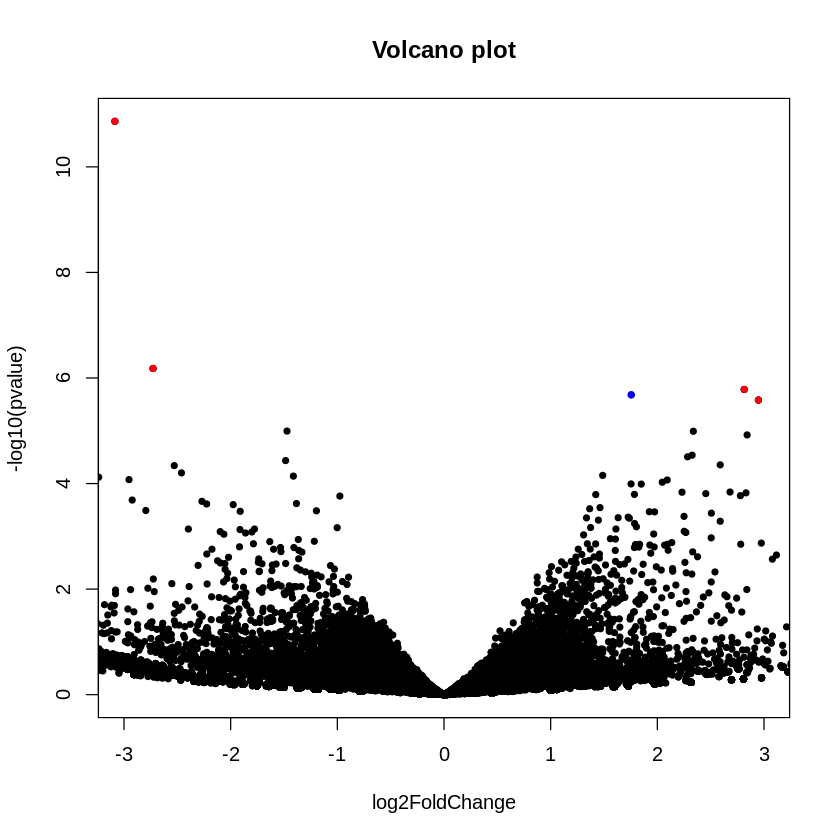

In [ ]:
#code to create volcano plot

#reset par
par(mfrow=c(1,1))
# Make a basic volcano plot
with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

# Add colored points: blue if padj<0.01, red if log2FC>1 and padj<0.05)
with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

In [ ]:
#filter and remove col having values NA for padj
result1<- subset(result, padj != "NA")

In [ ]:
head(result1)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S100P,108.704230,-3.085421,0.4563657,-6.760854,1.371811e-11,3.558340e-07
RIMBP3B,46.738914,-8.258848,1.5713419,-5.255921,1.472858e-07,1.910223e-03
AL132780.3,7.395857,7.083970,1.4102260,5.023287,5.079452e-07,4.281500e-03
VNN1,560.720180,-2.727828,0.5485598,-4.972708,6.602414e-07,4.281500e-03
BAG1,160.191295,2.814394,0.5872701,4.792333,1.648531e-06,8.552250e-03
PRDX5,231.373429,1.755270,0.3699205,4.744993,2.085135e-06,9.014385e-03


In [ ]:
tail(result1)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MKRN2,57.2986036,3.928616e-05,0.3948475,9.949707e-05,0.9999206,0.9999966
PLEKHA3P1,0.8930598,-2.613111e-04,2.4614135,-1.061630e-04,0.9999153,0.9999966
PRKCZ,2.4823178,8.667472e-04,1.3891104,6.239585e-04,0.9995022,0.9999966
SMCHD1,1255.3372851,3.253464e-05,0.4491307,7.243914e-05,0.9999422,0.9999966
STN1,59.8517373,-3.438424e-05,0.4361361,-7.883832e-05,0.9999371,0.9999966
TCTN3,8.2994220,3.151188e-04,0.8429700,3.738197e-04,0.9997017,0.9999966


In [ ]:
# Sort features based on FDRy value
sorted_features <- as.data.frame(result1[order(result1[,"padj"], decreasing =  FALSE),])

In [ ]:
head(sorted_features)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S100P,108.704230,-3.085421,0.4563657,-6.760854,1.371811e-11,3.558340e-07
RIMBP3B,46.738914,-8.258848,1.5713419,-5.255921,1.472858e-07,1.910223e-03
AL132780.3,7.395857,7.083970,1.4102260,5.023287,5.079452e-07,4.281500e-03
VNN1,560.720180,-2.727828,0.5485598,-4.972708,6.602414e-07,4.281500e-03
BAG1,160.191295,2.814394,0.5872701,4.792333,1.648531e-06,8.552250e-03
PRDX5,231.373429,1.755270,0.3699205,4.744993,2.085135e-06,9.014385e-03


In [ ]:
tail(sorted_features)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MKRN2,57.2986036,3.928616e-05,0.3948475,9.949707e-05,0.9999206,0.9999966
PLEKHA3P1,0.8930598,-2.613111e-04,2.4614135,-1.061630e-04,0.9999153,0.9999966
PRKCZ,2.4823178,8.667472e-04,1.3891104,6.239585e-04,0.9995022,0.9999966
SMCHD1,1255.3372851,3.253464e-05,0.4491307,7.243914e-05,0.9999422,0.9999966
STN1,59.8517373,-3.438424e-05,0.4361361,-7.883832e-05,0.9999371,0.9999966
TCTN3,8.2994220,3.151188e-04,0.8429700,3.738197e-04,0.9997017,0.9999966


In [ ]:
#select significant features based on FDR <0.05
sig_features <- sorted_features[sorted_features$padj < 0.05, ]

In [ ]:
dim(sig_features)

[1] 11  6

In [ ]:
#select top features based on FDR <0.05 & FC > +/- 1.2
# upregulated genes
upreg_features <- sig_features[sig_features$log2FoldChange > 1.2, ]

In [ ]:
dim(upreg_features)

[1] 7 6

In [ ]:
upreg_features

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL132780.3,7.395857,7.083970,1.4102260,5.023287,5.079452e-07,0.004281500
BAG1,160.191295,2.814394,0.5872701,4.792333,1.648531e-06,0.008552250
PRDX5,231.373429,1.755270,0.3699205,4.744993,2.085135e-06,0.009014385
TMEM189-UBE2V1,6.791855,7.009448,1.4993703,4.674928,2.940564e-06,0.009534412
UBB,1219.007426,2.947678,0.6273508,4.698612,2.619359e-06,0.009534412
CFD,116.657847,2.337646,0.5297992,4.412324,1.022671e-05,0.026527067
BLVRB,123.093497,2.841635,0.6490955,4.377838,1.198624e-05,0.028264644


In [ ]:
#upregulated genes
downreg_features <- sig_features[sig_features$log2FoldChange < -1.2, ]

In [ ]:
dim(downreg_features)

[1] 4 6

In [ ]:
downreg_features

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S100P,108.70423,-3.085421,0.4563657,-6.760854,1.371811e-11,3.558340e-07
RIMBP3B,46.73891,-8.258848,1.5713419,-5.255921,1.472858e-07,1.910223e-03
VNN1,560.72018,-2.727828,0.5485598,-4.972708,6.602414e-07,4.281500e-03
B4GALT5,1381.67699,-1.471832,0.3334301,-4.414216,1.013768e-05,2.652707e-02


In [ ]:
#Write results of significantly upreguated  genes into a file
#write the file WITH FIRST AS ID.
write.table(data.frame('ID'=rownames(upreg_features), upreg_features),file="GSE178967_4sev_4asymp_upreg.txt",sep='\t',quote = F,row.names = FALSE)
#write.table(upreg_features,file="/content/GSE178967_sev_asym_padj_0.05_upreg_features.txt", sep='\t',  quote = F,row.names = T)

In [ ]:
#Write results of significantly downreguated  genes  into a file
#write.table(downreg_features,file="/content/GSE178967_sev_asym_padj_0.05_downreg_features.txt", sep='\t',  quote = F,row.names = T)

#write the file WITH FIRST AS ID.
write.table(data.frame('ID'=rownames(downreg_features), downreg_features),file="GSE178967_4sev_4asymp_downreg.txt",sep='\t',quote = F,row.names = FALSE)




vst

In [ ]:
#First we need to transform the raw count data
#vst function will perform variance stabilizing transformation (VST)
#dds is deseq2dataset created in one of the above step.

vsdata <- vst(dds, blind=FALSE)
vsd <- vst(dds, blind=FALSE)
rld <- rlog(dds, blind=FALSE)
head(assay(vsd), 3)

,L_001_00,L_142_00,L_148_00,L_150_00,L_313_00,L_318_00,L_344_00,L_006_00,L_118_00,L_174_00,L_301_00,L_303_00,L_311_00,L_325_00,L_329_00
A1BG,5.532435,5.435789,5.397818,5.305047,4.691329,5.296085,4.990755,5.048005,5.133163,5.558367,5.270838,5.141194,5.297057,5.694713,4.366465
A1CF,3.465043,3.332043,3.443606,3.387150,2.983112,3.548910,3.181283,3.263578,3.208563,3.775568,3.598312,3.347140,3.375429,3.583652,3.016008
A2M,5.160936,6.109316,6.095235,7.077576,6.740540,6.348774,6.240826,4.751484,6.111373,6.178414,7.034126,6.610783,5.254696,5.694713,4.769505


In [ ]:
#First we need to transform the raw count data
#vst function will perform variance stabilizing transformation
#IMPORTANT TO NOT THAT WE USE dds OBJECT HERE. WHY? 

vsdata <- vst(dds, blind=FALSE)

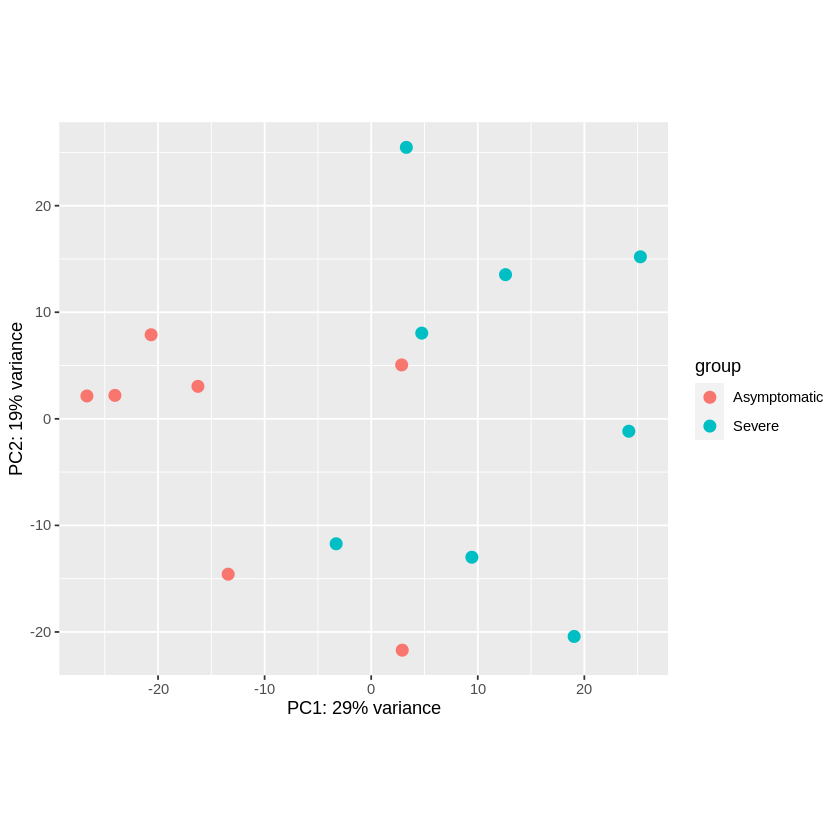

In [ ]:
#using the DESEQ2 plotPCA fxn we can
plotPCA(vsdata, intgroup="Severity") 

heatmap

In [ ]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(pheatmap)

In [ ]:
# this gives log2(n + 1)
ntd <- normTransform(dds)

In [ ]:
assay(ntd)

,L_001_00,L_142_00,L_148_00,L_150_00,L_313_00,L_318_00,L_344_00,L_006_00,L_118_00,L_174_00,L_301_00,L_303_00,L_311_00,L_325_00,L_329_00
A1BG,5.2022537,5.081649,5.0337756,4.915573,4.0788372,4.904058,4.500352,4.5778576,4.6915303,5.2343222,4.871524,4.7021540,4.905307,5.401041,3.5840645
A1CF,1.8927093,1.590739,1.8449842,1.717523,0.7580867,2.075767,1.233924,1.4302693,1.2993457,2.5413885,2.180844,1.6256957,1.690747,2.149876,0.8360703
A2M,4.7282035,5.891153,5.8748684,6.967661,6.6011501,6.164807,6.042181,4.1658879,5.8935296,5.9707404,6.920798,6.4580028,4.850648,5.401041,4.1917190
A2ML1,2.6840643,2.814778,2.6287690,2.748844,1.9126440,2.075767,1.889130,2.6052360,1.9717164,2.9542124,2.180844,2.5526529,2.716024,2.149876,1.7465462
A2MP1,4.0649907,4.931204,4.8514627,6.145795,5.3848623,5.621620,5.329472,2.7933539,5.1129906,4.5644394,5.846669,5.3690330,4.146638,3.499997,2.5137650
A3GALT2,2.6840643,2.946130,1.8449842,0.000000,1.9126440,0.000000,2.338047,0.8855627,1.6743516,2.5413885,0.000000,1.2573765,3.137312,0.000000,0.0000000
A4GALT,1.6647811,2.122141,2.2894613,2.148306,1.2524716,2.893628,0.000000,2.3888578,1.6743516,2.6561850,3.012278,2.5526529,2.118478,2.977425,1.7465462
A4GNT,0.6254237,0.000000,0.0000000,0.000000,0.7580867,0.000000,0.000000,0.0000000,0.0000000,2.1292972,0.000000,0.0000000,0.000000,2.977425,0.0000000
AAAS,2.6840643,2.814778,2.7725409,2.479600,2.8522418,2.075767,3.187824,2.1342013,2.2181398,1.9608431,2.180844,1.9188489,2.447970,2.149876,2.5137650
AACS,4.8142013,4.763224,4.6427324,4.771897,3.4164948,4.342989,3.719023,4.0227878,4.1540876,4.5644394,4.472821,4.3553326,4.052909,4.434786,3.4863736


In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [ ]:
BiocManager::install("vsn")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'vsn'

also installing the dependencies ‘affyio’, ‘preprocessCore’, ‘affy’, ‘limma’


Old packages: 'broom', 'cli', 'dtplyr', 'fansi', 'gert', 'jsonlite', 'Rcpp',
  'testthat', 'class', 'foreign', 'MASS', 'nlme', 'nnet', 'spatial'



In [ ]:
library("vsn")

In [ ]:
install.packages("hexbin") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



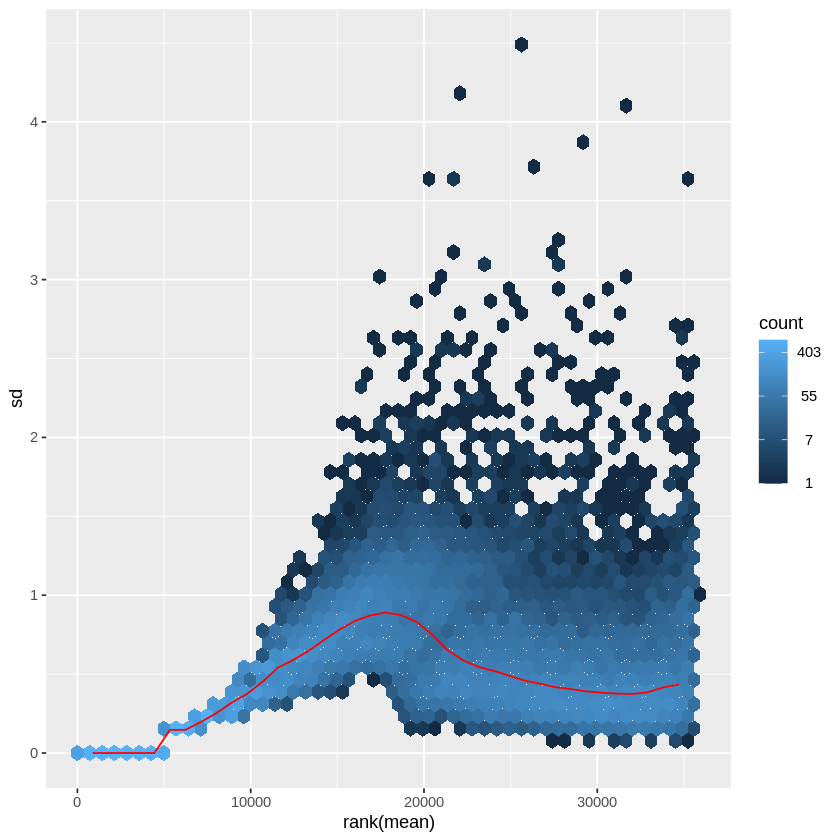

In [ ]:
meanSdPlot(assay(ntd))

In [ ]:
#pheatmap
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)[1:20]

In [ ]:
select

[1]  1210 16215 21330 21338 16214 16213 28818 21327 20826 14958 31679 32342
[13] 17267 24631 20833 19732 21329 17266 20835 30772

In [ ]:
df <- as.data.frame(colData(dds)["Severity"])

In [ ]:
head(df)

,Severity
,<fct>
L_001_00,Asymptomatic
L_142_00,Asymptomatic
L_148_00,Asymptomatic
L_150_00,Asymptomatic
L_313_00,Asymptomatic
L_318_00,Asymptomatic


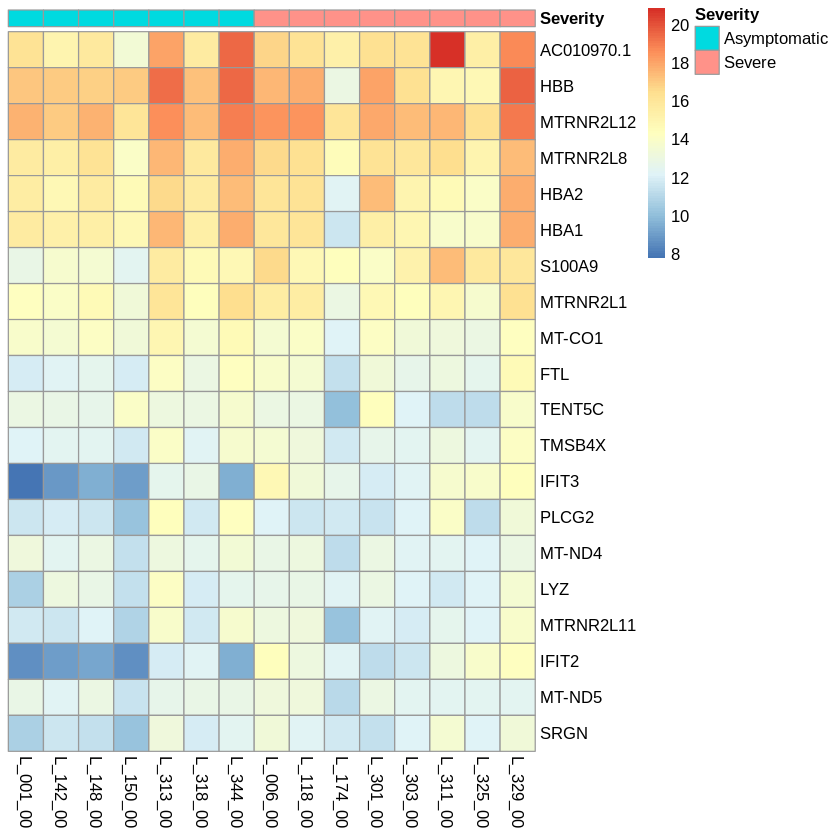

In [ ]:
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=T, cluster_cols=FALSE, annotation_col=df)

In [ ]:
Deseq_norm <- as.data.frame(assay(ntd))

In [ ]:
dim(Deseq_norm )

[1] 35587    15

In [ ]:
#wrtite into a file
write.table(Deseq_norm, file="/content/DESEQ_NORM.txt", sep='\t',  quote = F)